## Amazon Food and Grocery Review Sentiment Analysis

## Loading Library

In [1]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
#from gensim.summarization import summarize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Loading Dataset

In [2]:

# Load the JSON file into a pandas dataframe
data = pd.read_json('Grocery_and_Gourmet_Food_5.json.gz', lines=True)

In [3]:
metadf = pd.read_json('meta_Grocery_and_Gourmet_Food.json.gz', lines=True)

In [4]:
metadf

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs,...",,"[BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS, Stat...",,Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],,Ariola Imports,[],"165,181 in Grocery & Gourmet Food (","[B0000D9MYM, B0000D9MYL, B00ADHIGBA, B00H9OX59...",Grocery,,,$41.91,0681727810,[],[],NaN
1,"[Grocery & Gourmet Food, Cooking & Baking, Sug...",,"[Shipped from UK, please allow 10 to 21 busine...",,Trim Healthy Mama Xylitol,"[B01898YHXK, B01BCM6LAC, B00Q4OL47O, B00Q4OL5Q...",,,[],"315,867 in Grocery & Gourmet Food (",[],Grocery,,,,0853347867,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,[Jazz up your cakes with a sparkling monogram ...,,Letter C - Swarovski Crystal Monogram Wedding ...,[],,Unik Occasions,[],"[>#669,941 in Kitchen & Dining (See Top 100 in...",[B07DXN65TF],Amazon Home,,"September 21, 2010",$29.95,1888861118,[],[],NaN
3,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,"[Large Letter - Height 4.75""]",,Letter H - Swarovski Crystal Monogram Wedding ...,[],,Other,"[Large Letter - Height 4.75""]","[>#832,581 in Kitchen & Dining (See Top 100 in...",[],Amazon Home,,"September 11, 2011",$11.45,1888861517,[],[],NaN
4,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",,"[4.75""]",,Letter S - Swarovski Crystal Monogram Wedding ...,[],,Unik Occasions,"[4.75"" height]","[>#590,999 in Kitchen & Dining (See Top 100 in...",[],Amazon Home,,"September 11, 2011",$15.00,1888861614,[],[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287046,"[Grocery & Gourmet Food, Jams, Jellies & Sweet...",,[Caffarel fruit jellies are a product of Italy...,,"Caffarel Fruit Jellies, Organic Assorted, 200 ...","[B01HULC3TC, B07C8L4NWL, B014UTG6D6, B01M3UOLAP]",,Caffarel,[],"369,384 in Grocery & Gourmet Food (",[],Grocery,,,,B01HJFBN9A,[],[],{' Product Dimensions: ': '11.8 x 4.7...
287047,"[Grocery & Gourmet Food, Condiments & Salad Dr...",,[Hampton Creeks Just Mayo Truffle makes fancy ...,,"HAMPTON CREEK Spo Just Truffle Mayo, 12 Ounce","[B00WNAEX2Q, B071LD7PMJ, B01HJF6FRA, B072HG8GF...",,Hampton Creek,[],"113,710 in Grocery & Gourmet Food (",[],Grocery,,,$10.89,B01HJFC704,[],[],"{'Shipping Weight:': '12 ounces (', 'Domestic ..."
287048,"[Grocery & Gourmet Food, Condiments & Salad Dr...",,[Nothing compares with the classically zesty f...,,"HAMPTON CREEK Just Ranch Dressing, 12 Fluid Ounce","[B071LD7PMJ, B00KOHNX6C, B00OVN2F64, B01HJEHE9...",,Hampton Creek,[],"21,731 in Grocery & Gourmet Food (",[],Grocery,,,$10.95,B01HJF6FRA,[],[],"{'Shipping Weight:': '10.4 ounces (', 'Domesti..."
287049,"[Grocery & Gourmet Food, Herbs, Spices & Seaso...",,[],,Gourmet Pure Vanilla Bean Pastes - Organically...,"[B00DUF219A, B01HJHX9ZO, B07K4K26PQ, B000H7ENQ...",,Heilala Vanilla,[],472 in Grocery & Gourmet Food (,[],Grocery,,,$14.97,B01HJHSVG6,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Shipping Weight:': '5.6 ounces (', 'ASIN: ':..."


In [5]:
df = pd.merge(data, metadf, on='asin')

In [6]:
df.tail(5)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
1167884,5,True,"06 17, 2018",APSZQFU7VQB37,B01HIY2FI0,Phil Farnsworth,I am very satisfied with this brand of koji ri...,I am very satisfied with this brand of koji rice,1529193600,NaN,...,[],"81,706 in Grocery & Gourmet Food (",[],Grocery,,,$10.00,[],[],"{' Item Weight: ': '1 pounds', 'Shipp..."
1167885,5,True,"01 24, 2018",A1I18910DUUAHE,B01HIY2FI0,Lady J.M.,Unbeatable quality! I purchased different bran...,Unbeatable quality!,1516752000,2,...,[],"81,706 in Grocery & Gourmet Food (",[],Grocery,,,$10.00,[],[],"{' Item Weight: ': '1 pounds', 'Shipp..."
1167886,4,True,"11 20, 2017",A29CT3MXKBWVQ6,B01HIY2FI0,UrbanMonique,Great for making your own Chinese style rice w...,High quality stuff,1511136000,NaN,...,[],"81,706 in Grocery & Gourmet Food (",[],Grocery,,,$10.00,[],[],"{' Item Weight: ': '1 pounds', 'Shipp..."
1167887,4,True,"12 13, 2016",A24QRG75XCS2H7,B01HIY2FI0,DenverEmma,"Great for making your own miso, though quite p...",Miso-making essential,1481587200,4,...,[],"81,706 in Grocery & Gourmet Food (",[],Grocery,,,$10.00,[],[],"{' Item Weight: ': '1 pounds', 'Shipp..."
1167888,5,False,"09 18, 2016",A3PIZBX8U0SSJV,B01HIY2FI0,Sara McCoy,"If you need koji rice for a project at home, w...","If Looking for Kome-Koji aka Koji Rice, Give R...",1474156800,34,...,[],"81,706 in Grocery & Gourmet Food (",[],Grocery,,,$10.00,[],[],"{' Item Weight: ': '1 pounds', 'Shipp..."


In [58]:
df

,overall,verified,reviewTime,asin,reviewText,summary,brand,price,main_cat,clean_text,polarity,subjectivity,sentiment_category,review_length
0,5,True,"11 19, 2014",4639725183,No adverse comment.,Five Stars,Lipton,$12.98,Grocery,adverse comment,0.000000,0.000000,Neutral,3
1,5,True,"10 13, 2016",4639725183,Gift for college student.,Great product.,Lipton,$12.98,Grocery,gift college student,0.000000,0.000000,Neutral,4
2,5,True,"11 21, 2015",4639725183,"If you like strong tea, this is for you. It mi...",Strong,Lipton,$12.98,Grocery,like strong tea might even little strong,0.226389,0.655556,Positive,19
3,5,True,"08 12, 2015",4639725183,Love the tea. The flavor is way better than th...,Great tea,Lipton,$12.98,Grocery,love tea flavor way better regular lipton blac...,0.226667,0.342051,Positive,18
4,5,True,"05 28, 2015",4639725183,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,Lipton,$12.98,Grocery,searched everywhere browsed amazon found tea l...,-0.050000,0.516667,Negative,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167884,5,True,"06 17, 2018",B01HIY2FI0,I am very satisfied with this brand of koji ri...,I am very satisfied with this brand of koji rice,Rhapsody Natural Foods,$10.00,Grocery,satisfied brand koji rice every grain good coa...,0.583333,0.775000,Positive,50
1167885,5,True,"01 24, 2018",B01HIY2FI0,Unbeatable quality! I purchased different bran...,Unbeatable quality!,Rhapsody Natural Foods,$10.00,Grocery,unbeatable quality purchased different brands ...,0.162500,0.534722,Positive,35
1167886,4,True,"11 20, 2017",B01HIY2FI0,Great for making your own Chinese style rice w...,High quality stuff,Rhapsody Natural Foods,$10.00,Grocery,great making chinese style rice wine lees leas...,0.125000,0.233333,Positive,36
1167887,4,True,"12 13, 2016",B01HIY2FI0,"Great for making your own miso, though quite p...",Miso-making essential,Rhapsody Natural Foods,$10.00,Grocery,great making miso though quite pricey still op...,0.800000,0.750000,Positive,16


In [6]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image', 'category', 'tech1', 'description', 'fit', 'title',
       'also_buy', 'tech2', 'brand', 'feature', 'rank', 'also_view',
       'main_cat', 'similar_item', 'date', 'price', 'imageURL',
       'imageURLHighRes', 'details'],
      dtype='object')

In [7]:
#Dropping uneccessary columns
df = df[['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary', 'brand', 'price', 'main_cat']]

In [8]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary',
       'brand', 'price', 'main_cat'],
      dtype='object')

In [16]:
df

,overall,verified,reviewTime,asin,reviewText,summary,brand,price,main_cat
0,5,True,"11 19, 2014",4639725183,No adverse comment.,Five Stars,Lipton,$12.98,Grocery
1,5,True,"10 13, 2016",4639725183,Gift for college student.,Great product.,Lipton,$12.98,Grocery
2,5,True,"11 21, 2015",4639725183,"If you like strong tea, this is for you. It mi...",Strong,Lipton,$12.98,Grocery
3,5,True,"08 12, 2015",4639725183,Love the tea. The flavor is way better than th...,Great tea,Lipton,$12.98,Grocery
4,5,True,"05 28, 2015",4639725183,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,Lipton,$12.98,Grocery
...,...,...,...,...,...,...,...,...,...
1167884,5,True,"06 17, 2018",B01HIY2FI0,I am very satisfied with this brand of koji ri...,I am very satisfied with this brand of koji rice,Rhapsody Natural Foods,$10.00,Grocery
1167885,5,True,"01 24, 2018",B01HIY2FI0,Unbeatable quality! I purchased different bran...,Unbeatable quality!,Rhapsody Natural Foods,$10.00,Grocery
1167886,4,True,"11 20, 2017",B01HIY2FI0,Great for making your own Chinese style rice w...,High quality stuff,Rhapsody Natural Foods,$10.00,Grocery
1167887,4,True,"12 13, 2016",B01HIY2FI0,"Great for making your own miso, though quite p...",Miso-making essential,Rhapsody Natural Foods,$10.00,Grocery


In [10]:
#Checking for null values
df.isna().sum()

overall         0
verified        0
reviewTime      0
asin            0
reviewText    395
summary       220
brand           0
price           0
main_cat        0
dtype: int64

In [11]:
#Dropping null
df.dropna(inplace=True)

In [12]:
#Checking for null values
df.isna().sum()

overall       0
verified      0
reviewTime    0
asin          0
reviewText    0
summary       0
brand         0
price         0
main_cat      0
dtype: int64

In [13]:
df.head(10)

,overall,verified,reviewTime,asin,reviewText,summary,brand,price,main_cat
0,5,True,"11 19, 2014",4639725183,No adverse comment.,Five Stars,Lipton,$12.98,Grocery
1,5,True,"10 13, 2016",4639725183,Gift for college student.,Great product.,Lipton,$12.98,Grocery
2,5,True,"11 21, 2015",4639725183,"If you like strong tea, this is for you. It mi...",Strong,Lipton,$12.98,Grocery
3,5,True,"08 12, 2015",4639725183,Love the tea. The flavor is way better than th...,Great tea,Lipton,$12.98,Grocery
4,5,True,"05 28, 2015",4639725183,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,Lipton,$12.98,Grocery
5,4,True,"05 9, 2015",4639725183,Tea made with Lipton Yellow Label teabags is m...,Four Stars,Lipton,$12.98,Grocery
6,5,True,"05 7, 2015",4639725183,"I love this tea! Okay, I'm not a high falutin...",Love this tea!,Lipton,$12.98,Grocery
7,5,True,"01 28, 2015",4639725183,Discovered this tea at a local Med. Rest....a ...,Great tea,Lipton,$12.98,Grocery
8,4,True,"12 23, 2014",4639725183,Well I bought this tea after being in Malaysia...,Well I bought this tea after being in Malaysia...,Lipton,$12.98,Grocery
9,5,True,"12 17, 2014",4639725183,We really like this tea. It is definitely dif...,We really like this tea,Lipton,$12.98,Grocery


In [14]:
df.value_counts('asin')

asin
B00BUKL666    7383
B008QMX2SG    6224
B00D3M2QP4    6217
B0001LO3FG    5842
B00R7PWK7W    3385
              ... 
B000MAOW20       1
B000WW6VZO       1
B0014E4D40       1
B0011MQSSY       1
B0017I1QAW       1
Length: 41280, dtype: int64

#### Calculating the Average Rating

In [14]:
average_rating = df['overall'].mean()
std_rating = df['overall'].std()
print("The Average Rating is:", round(average_rating, 2))
print("The Standard Deviation is:", round(std_rating, 2))

The Average Rating is: 4.44
The Standard Deviation is: 1.06


In [18]:
df.value_counts('overall').sort_index(ascending=False)

overall
5    837988
4    153595
3     82128
2     42865
1     50739
dtype: int64

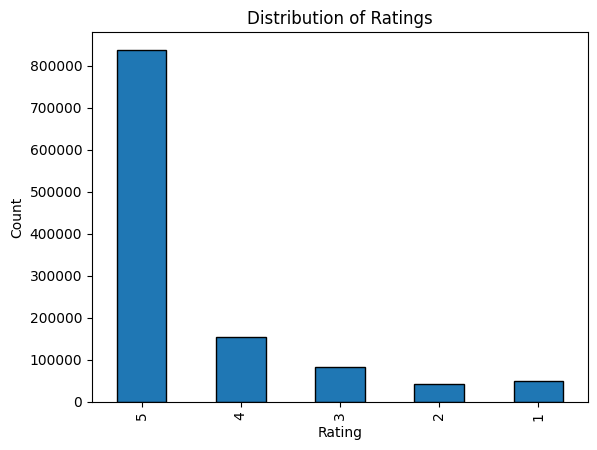

In [20]:
# Count the occurrences of each rating
counts = df['overall'].value_counts().sort_index(ascending=False)

# Plot a bar chart of the ratings
counts.plot(kind='bar', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# Show the plot
plt.show()


The majority of ratings are 5 stars, with 837,988 reviews out of a total of 1,167,315 reviews. This is followed by 4-star ratings, with 153,595 reviews.

The distribution also shows that there are a considerable number of 1-star and 2-star ratings, with 50,739 and 42,865 reviews, respectively. This indicates that there are customers who are not satisfied with the products they have received.

The number of 3-star ratings is relatively smaller compared to the other categories, with 82,128 reviews.

Overall, the distribution suggests that there is some variation in the ratings, with a larger number of positive ratings (4 and 5 stars) and a smaller number of negative ratings (1 and 2 stars).

The mean rating for Amazon grocery and Gourmet food reviews is 4.44 out of 5, which suggests that the products are generally well-liked by customers.

The standard deviation of 1.06 indicates that there is a moderate amount of variation in the ratings. A higher standard deviation would indicate a wider range of ratings, while a lower standard deviation would indicate that most of the ratings are very close to the mean. In this case, a standard deviation of 1.06 suggests that there is some variation in the ratings, but not an excessive amount.

In [21]:
import pandas as pd
from textblob import TextBlob
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string


# Define a function to clean the text column
def clean_text(reviewText):
    # Remove punctuation
    reviewText = reviewText.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    reviewText = reviewText.lower()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    reviewText = ' '.join([word for word in reviewText.split() if word not in stop_words])
    return reviewText

# Apply the clean_text function to the text column
df['clean_text'] = df['reviewText'].apply(clean_text)

def get_sentiment(reviewText):
    sentiment = TextBlob(reviewText).sentiment
    return sentiment.polarity, sentiment.subjectivity

# Apply the function to the reviews and add sentiment scores to the dataset
df[['polarity', 'subjectivity']] = pd.DataFrame(df['clean_text'].apply(get_sentiment).tolist(), index=df.index)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
df

,overall,verified,reviewTime,asin,reviewText,summary,brand,price,main_cat,clean_text,polarity,subjectivity
0,5,True,"11 19, 2014",4639725183,No adverse comment.,Five Stars,Lipton,$12.98,Grocery,adverse comment,0.000000,0.000000
1,5,True,"10 13, 2016",4639725183,Gift for college student.,Great product.,Lipton,$12.98,Grocery,gift college student,0.000000,0.000000
2,5,True,"11 21, 2015",4639725183,"If you like strong tea, this is for you. It mi...",Strong,Lipton,$12.98,Grocery,like strong tea might even little strong,0.226389,0.655556
3,5,True,"08 12, 2015",4639725183,Love the tea. The flavor is way better than th...,Great tea,Lipton,$12.98,Grocery,love tea flavor way better regular lipton blac...,0.226667,0.342051
4,5,True,"05 28, 2015",4639725183,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,Lipton,$12.98,Grocery,searched everywhere browsed amazon found tea l...,-0.050000,0.516667
...,...,...,...,...,...,...,...,...,...,...,...,...
1167884,5,True,"06 17, 2018",B01HIY2FI0,I am very satisfied with this brand of koji ri...,I am very satisfied with this brand of koji rice,Rhapsody Natural Foods,$10.00,Grocery,satisfied brand koji rice every grain good coa...,0.583333,0.775000
1167885,5,True,"01 24, 2018",B01HIY2FI0,Unbeatable quality! I purchased different bran...,Unbeatable quality!,Rhapsody Natural Foods,$10.00,Grocery,unbeatable quality purchased different brands ...,0.162500,0.534722
1167886,4,True,"11 20, 2017",B01HIY2FI0,Great for making your own Chinese style rice w...,High quality stuff,Rhapsody Natural Foods,$10.00,Grocery,great making chinese style rice wine lees leas...,0.125000,0.233333
1167887,4,True,"12 13, 2016",B01HIY2FI0,"Great for making your own miso, though quite p...",Miso-making essential,Rhapsody Natural Foods,$10.00,Grocery,great making miso though quite pricey still op...,0.800000,0.750000


In [24]:
average_sentiment = df['polarity'].mean()
print("The overall sentiment score is:", round(average_sentiment, 3))

The overall sentiment score is: 0.353


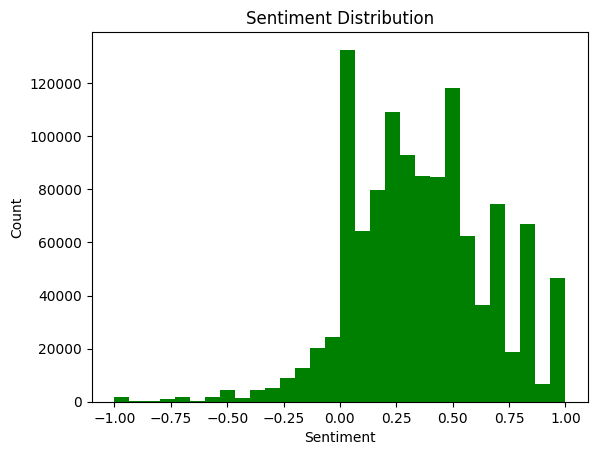

In [25]:
sentiment_counts = df['polarity'].value_counts().sort_index()
plt.hist(df['polarity'], bins=30, color='green')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [38]:
# calculate the average sentiment score for each product
avg_sentiment = df.groupby('asin')['polarity'].mean()

# print the top 10 products with the highest average sentiment score
print(avg_sentiment.nlargest(10))

asin
B000X0Z9CQ    1.00000
B00930SE9C    0.96000
B0015GPUJY    0.87500
B00M3EDDA0    0.87000
B0013F78VA    0.86750
B00LDA4FUM    0.86375
B01GVTO43W    0.86000
B004AH7A48    0.85200
B000XQRJCI    0.85000
B0011VWW9Y    0.85000
Name: polarity, dtype: float64


In [46]:
# calculate the average sentiment score for each product
avg_sentiment = df.groupby('brand')['polarity'].mean()

# print the top 10 products with the highest average sentiment score
print(avg_sentiment.nlargest(20))

brand
NineChef                               1.000000
Truffettes                             0.867500
Gourmet Kruise                         0.840000
Mediterranean Organics                 0.820000
Supremo Italiano 100 % Arborio Rice    0.820000
Mayers                                 0.800000
cocomama                               0.800000
Frank and Sal                          0.765500
The Jel Sert Company                   0.756250
Duerr's                                0.750000
JustFruit Bars                         0.739222
Montgomery Inn                         0.732602
Tic Tacs                               0.720556
Serendipity 3                          0.716667
Poppie's Cookies                       0.715972
Dr. Sol                                0.710741
natureandherbs                         0.710000
GRACES BEST                            0.706429
Baby Delice                            0.703704
Thai Feast                             0.702381
Name: polarity, dtype: float64


In sentiment analysis, polarity refers to the sentiment orientation of a text, whether it expresses a positive, negative, or neutral sentiment. 

The polarity score is a numerical score that reflects the degree of positive or negative sentiment in a text, typically ranging from -1 (most negative) to 1 (most positive).

Subjectivity, on the other hand, refers to how opinionated or emotional the text is, and the subjectivity score measures the degree of personal opinion or emotion expressed in a text, typically ranging from 0 (most objective) to 1 (most subjective).

The sentiment score of 0.353 suggests that the overall sentiment of the reviews is positive, as the score is greater than 0. A sentiment score of 0 would indicate a neutral sentiment, while a score less than 0 would indicate a negative sentiment.

In [39]:
def get_sentiment_category(polarity):
    if polarity < 0:
        return 'Negative'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Apply the function to the polarity column and add a new column 'sentiment_category'
df['sentiment_category'] = df['polarity'].apply(get_sentiment_category)

In [40]:
df.value_counts('sentiment_category')

sentiment_category
Positive    984719
Neutral      94045
Negative     88551
dtype: int64

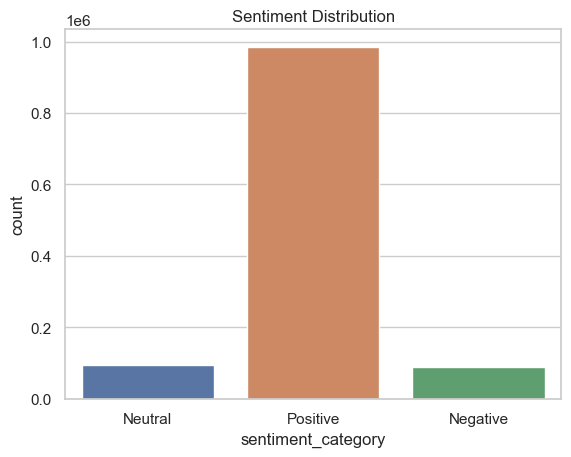

In [41]:
sns.countplot(x='sentiment_category', data=df)
plt.title('Sentiment Distribution')
plt.show()

In [42]:
df['review_length'] = df['reviewText'].apply(lambda x: len(x.split()))

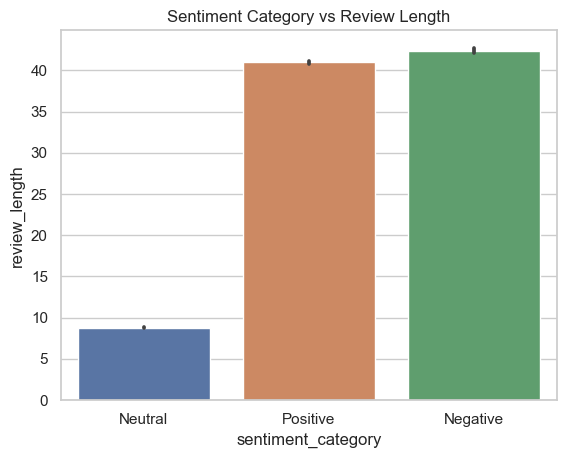

In [63]:
sns.barplot(x='sentiment_category', y='review_length', data=df)
plt.title('Sentiment Category vs Review Length')
plt.show()

The sentiment_category represents the count of reviews that have been classified as Positive, Neutral, and Negative sentiment categories.

From the count, we can conclude that the majority of the reviews are classified as Positive sentiment, with 984,719 reviews falling in this category. This suggests that customers are generally satisfied with the Amazon grocery and gourmet food products they have purchased and reviewed.

There are also a significant number of reviews classified as Neutral sentiment, with 94,045 reviews falling in this category. This suggests that these reviews may be more factual in nature and do not necessarily express a strong opinion or sentiment one way or the other.

Lastly, the number of reviews classified as Negative sentiment is 88,551, which is comparatively lower than the Positive sentiment count. This suggests that while there are some negative reviews, they are not as prevalent as Positive reviews, indicating that the majority of customers are satisfied with their purchases. However, it's important to note that negative reviews can still provide valuable feedback for improving products and services.

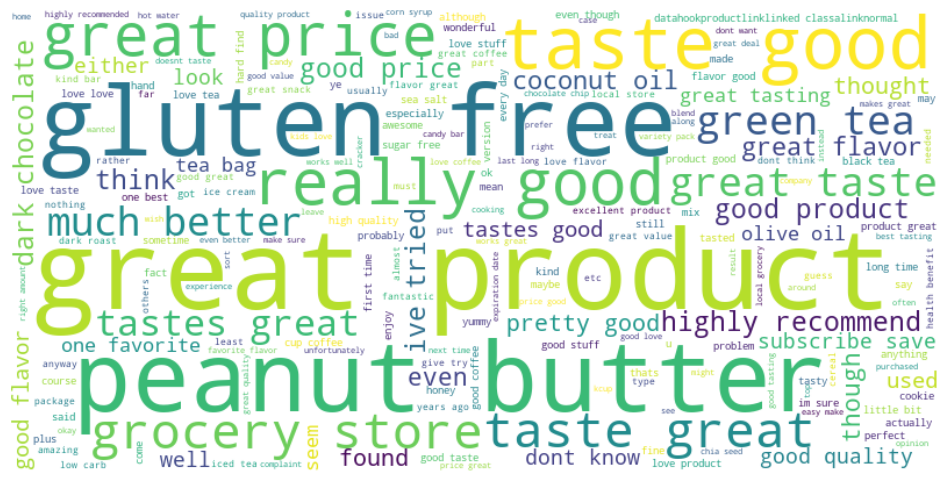

In [23]:
# Create a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['clean_text']))

# Display the wordcloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

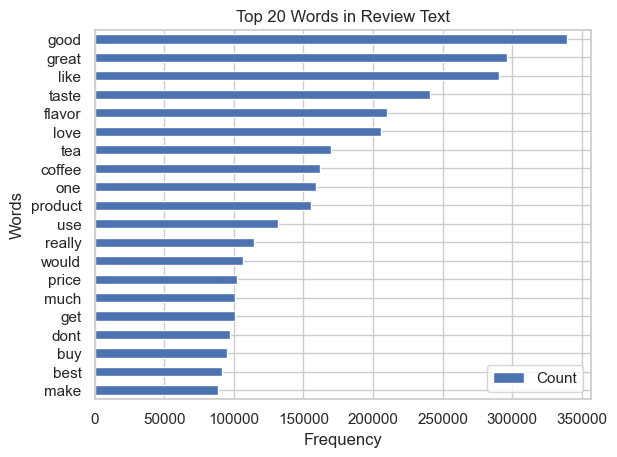

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# Create a Counter object to count the frequency of words
words_count = Counter(" ".join(df["clean_text"]).split()).most_common(20)

df_words = pd.DataFrame(words_count, columns=["Word", "Count"])
df_words = df_words.sort_values(by="Count", ascending=True)
df_words.plot.barh(x="Word", y="Count", rot=0)
plt.title("Top 20 Words in Review Text")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

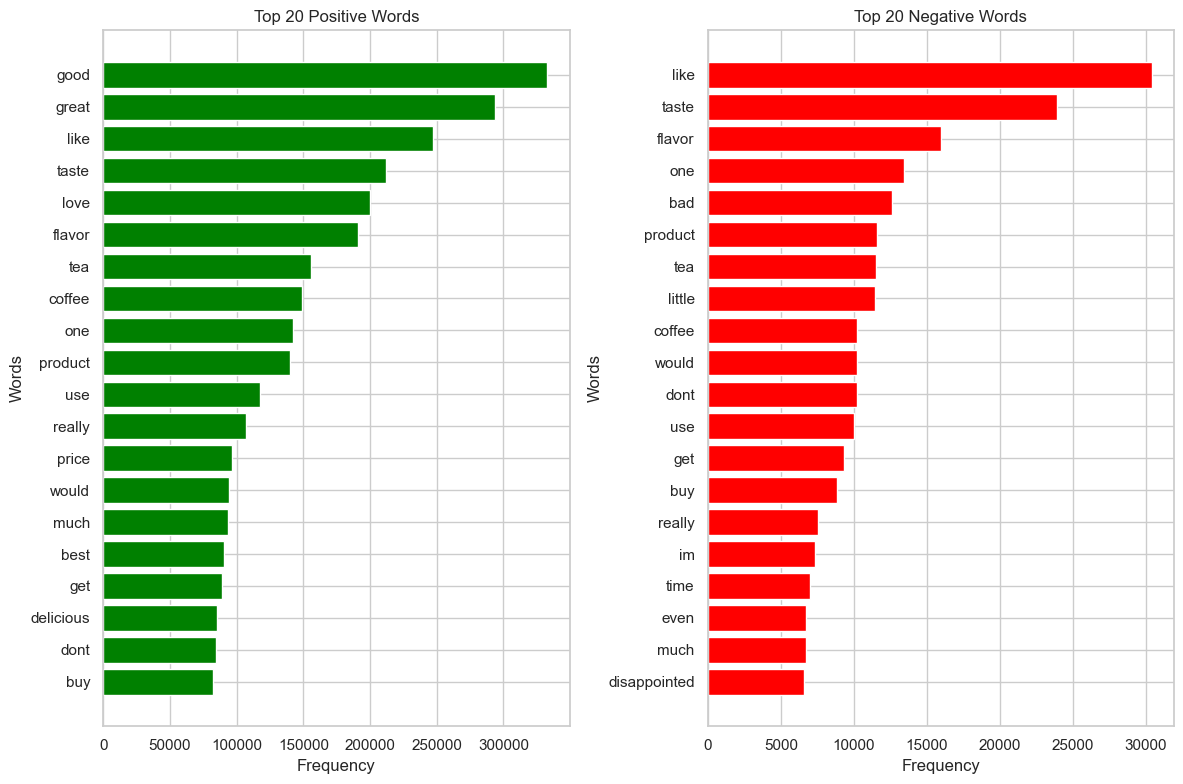

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Create a DataFrame for positive and negative words
df_pos = pd.DataFrame(pos_words_count, columns=["Word", "Count"])
df_pos = df_pos.sort_values(by="Count", ascending=True)
df_neg = pd.DataFrame(neg_words_count, columns=["Word", "Count"])
df_neg = df_neg.sort_values(by="Count", ascending=True)

# Plot the bar chart side by side
fig, axs = plt.subplots(ncols=2, figsize=(12, 8))

# Plot the positive words chart
axs[0].barh(df_pos["Word"], df_pos["Count"], color="green")
axs[0].set_title("Top 20 Positive Words")
axs[0].set_xlabel("Frequency")
axs[0].set_ylabel("Words")

# Plot the negative words chart
axs[1].barh(df_neg["Word"], df_neg["Count"], color="red")
axs[1].set_title("Top 20 Negative Words")
axs[1].set_xlabel("Frequency")
axs[1].set_ylabel("Words")

# Display the charts
plt.tight_layout()
plt.show()


In [55]:
df.head()

,overall,verified,reviewTime,asin,reviewText,summary,brand,price,main_cat,clean_text,polarity,subjectivity,sentiment_category,review_length
0,5,True,"11 19, 2014",4639725183,No adverse comment.,Five Stars,Lipton,$12.98,Grocery,adverse comment,0.000000,0.000000,Neutral,3
1,5,True,"10 13, 2016",4639725183,Gift for college student.,Great product.,Lipton,$12.98,Grocery,gift college student,0.000000,0.000000,Neutral,4
2,5,True,"11 21, 2015",4639725183,"If you like strong tea, this is for you. It mi...",Strong,Lipton,$12.98,Grocery,like strong tea might even little strong,0.226389,0.655556,Positive,19
3,5,True,"08 12, 2015",4639725183,Love the tea. The flavor is way better than th...,Great tea,Lipton,$12.98,Grocery,love tea flavor way better regular lipton blac...,0.226667,0.342051,Positive,18
4,5,True,"05 28, 2015",4639725183,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,Lipton,$12.98,Grocery,searched everywhere browsed amazon found tea l...,-0.050000,0.516667,Negative,39


In [66]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'asin', 'reviewText', 'summary',
       'brand', 'price', 'main_cat', 'clean_text', 'polarity', 'subjectivity',
       'sentiment_category', 'review_length'],
      dtype='object')

In [67]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer



# Encode categorical features
le = LabelEncoder()
df['sentiment_category'] = le.fit_transform(df['sentiment_category'])


In [68]:
df.head(3)

,overall,verified,reviewTime,asin,reviewText,summary,brand,price,main_cat,clean_text,polarity,subjectivity,sentiment_category,review_length
0,5,True,"11 19, 2014",4639725183,No adverse comment.,Five Stars,Lipton,$12.98,Grocery,adverse comment,0.000000,0.000000,1,3
1,5,True,"10 13, 2016",4639725183,Gift for college student.,Great product.,Lipton,$12.98,Grocery,gift college student,0.000000,0.000000,1,4
2,5,True,"11 21, 2015",4639725183,"If you like strong tea, this is for you. It mi...",Strong,Lipton,$12.98,Grocery,like strong tea might even little strong,0.226389,0.655556,2,19


In [76]:
# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=20)
X = tfidf.fit_transform(df['clean_text']).toarray()

# Concatenate the features into a single feature matrix
features = np.concatenate((X, df[['polarity', 'subjectivity', 'review_length']].values), axis=1)
labels = df['overall'].values


In [74]:
features

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.26388889e-01, 6.55555556e-01, 1.90000000e+01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.25000000e-01, 2.33333333e-01, 3.60000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.00000000e-01, 7.50000000e-01, 1.60000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.15833333e-01, 4.01666667e-01, 2.48000000e+02]])

In [77]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [78]:
# Evaluate the model on the testing set
y_pred = model.predict(X_test)
mse = np.mean((y_pred - y_test)**2)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.9139476152707381


In [82]:
# Predict the rating for a new review
new_review = "This product sucks!"
new_review_cleaned = clean_text(new_review)

# Vectorize the new review text using TF-IDF
new_review_tfidf = tfidf.transform([new_review_cleaned]).toarray()



In [83]:
new_review_polarity = TextBlob(new_review_cleaned).sentiment.polarity
new_review_subjectivity = TextBlob(new_review_cleaned).sentiment.subjectivity
new_review_length = len(new_review_cleaned)
new_review_features = np.concatenate((new_review_tfidf, [[new_review_polarity, new_review_subjectivity, new_review_length]]), axis=1)
new_review_rating = model.predict(new_review_features)[0]
print('Predicted rating for the new review:', new_review_rating)


Predicted rating for the new review: 3.5074102759774073


In [64]:
df.value_counts('brand')

brand
KIND              30269
Bob's Red Mill    18870
Twinings          15148
Planters          14204
Frontier           9865
                  ...  
TBA                   2
Mallo Cup             1
cocomama              1
Novus Tea             1
Appian Way            1
Length: 8862, dtype: int64